# trainONE model9_SPRING

WITH SENTENCE: 봄바람에 꽃잎도 방긋방긋 웃으며

springONE = {0:'leaf', 1:'wish', 2:'rainbow'}

- springONE.h5(1): 200/200/200 // epoch=50 // acc:100%
- springONE.h5(2): 1000/1000/1000 //epoch=50 // acc:99%
- springONE.h5(3): 1000/600/600 //epoch=30 // acc:99%
- springONE.h5(4): 1000/200/200 // epoch=30 // acc:97%
- springONE.h5(5):     

In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from itertools import chain

springONE = {0:'leaf', 1:'wish', 2:'rainbow'}
actions = []

for v in springONE.values():
    actions.append(v)

print(actions)

['leaf', 'wish', 'rainbow']


In [26]:
data = np.concatenate([
                       # leaf : 1000
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/springONE/one_SL_leaf_1636033892.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/springONE/one_SL_leaf_1636374226.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/springONE/one_SL_leaf_1636374331.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/springONE/one_SL_leaf_1636374433.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/springONE/one_SL_leaf_1636374552.npy'),
                       # rainbow : 1000
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/springONE/one_SL_rainbow_1636033892.npy'),
                       #np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/springONE/one_SL_rainbow_1636374226.npy'),
                       #np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/springONE/one_SL_rainbow_1636374331.npy'),
                       #np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/springONE/one_SL_rainbow_1636374433.npy'),
                       #np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/springONE/one_SL_rainbow_1636374552.npy'),
                       # wish : 1000
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/springONE/one_SL_wish_1636033892.npy'),
                       #np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/springONE/one_SL_wish_1636033892.npy'),
                       #np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/springONE/one_SL_wish_1636374226.npy'),
                       #np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/springONE/one_SL_wish_1636374433.npy'),
                       #np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/springONE/one_SL_wish_1636374552.npy')
], axis=0)

data.shape

(1330, 10, 90)

In [27]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)
print(len(actions))

(1330, 10, 89)
(1330,)
3


In [28]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))

y_data.shape

(1330, 3)

In [29]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1197, 10, 89) (1197, 3)
(133, 10, 89) (133, 3)


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                39424     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 99        
Total params: 41,603
Trainable params: 41,603
Non-trainable params: 0
_________________________________________________________________


In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=30,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/30
38/38 [==============================] - 2s 15ms/step - loss: 14.7813 - acc: 0.5748 - val_loss: 1.7840 - val_acc: 0.2331

Epoch 00001: val_acc improved from -inf to 0.23308, saving model to models/model.h5
Epoch 2/30
38/38 [==============================] - 0s 9ms/step - loss: 0.9061 - acc: 0.6416 - val_loss: 0.7196 - val_acc: 0.6541

Epoch 00002: val_acc improved from 0.23308 to 0.65414, saving model to models/model.h5
Epoch 3/30
38/38 [==============================] - 0s 8ms/step - loss: 0.4925 - acc: 0.8045 - val_loss: 0.5852 - val_acc: 0.7669

Epoch 00003: val_acc improved from 0.65414 to 0.76692, saving model to models/model.h5
Epoch 4/30
38/38 [==============================] - 0s 9ms/step - loss: 0.4359 - acc: 0.8371 - val_loss: 0.5029 - val_acc: 0.8195

Epoch 00004: val_acc improved from 0.76692 to 0.81955, saving model to models/model.h5
Epoch 5/30
38/38 [==============================] - 0s 8ms/step - loss: 0.3580 - acc: 0.8563 - val_loss: 0.4196 - val_acc: 0.8120

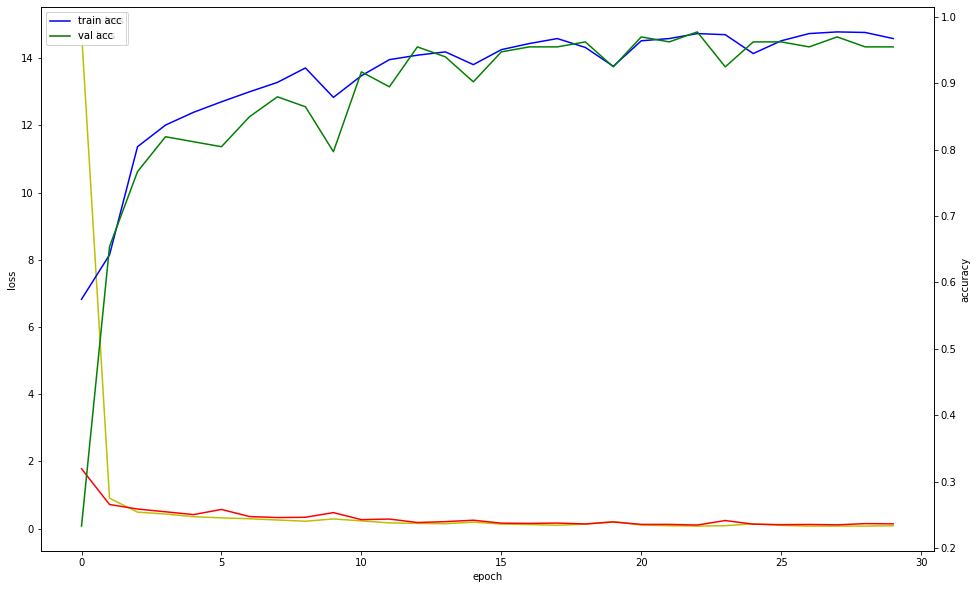

In [32]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [33]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[ 46,   2],
        [  0,  85]],

       [[111,   1],
        [  0,  21]],

       [[106,   0],
        [  3,  24]]])

In [34]:
from keras.models import load_model

model.save('springONE_4.h5')

from google.colab import files
files.download('springONE_4.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>